# Data Science Challenge Submission - Phillip Kim
<p>
    
## Purpose:
The purpose of this notebook is to provide a solution for The Iconic's Data Science Challenge.<br>
In this notebook, all four stage tasks will be attempted.<br>
The fourth stage task of delivering a reproducible report will be this Jupyter Notebook itself.<p>

## Challenge Tasks:

Taken from https://github.com/theiconic/datascientist/blob/master/README.md<p>

<font color=blue>

**Stage 1** :
Write SQL queries to answer the following questions:

*Note: At this stage it is ok to ignore the underlying errors in the data*

1. What was the total revenue to the nearest dollar for customers who have paid by credit card?
2. What percentage of customers who have purchased female items have paid by credit card?
3. What was the average revenue for customers who used either iOS, Android or Desktop?
4. We want to run an email campaign promoting a new mens luxury brand. Can you provide a list of customers we should send to?

**Stage 2** : *CLEAN* - Unhash the data (`test_data.zip`) using the secret key provided by us, extract it, most importantly clean it and put it in a form you can use - all programatically of course. We have also "intentionally" corrupted two columns in this file - two columns that might look correct but are not correct. They need "some correction" to be useful.

**Stage 3** : *BUILD* - Build a deep learning model (preferably) or any other model that suitably answers this question and predict the inferred gender using the features provided and deriving more featueres at your end. Remember, there is no gender flag, so you are flying blind here.

**Stage 4** : *DELIVER* - Package all your process, findings and code into a reproducible document that can be understood by a business user. A repo of the code branch would be a great thing to have! This **reproducible report**\* must answer the following questions:

1. How did you clean the data and what was wrong with it? Close to 90% of a Data Scientist's job is in cleaning data
2. What are the features you used as-is and which one did you engineer using the given ones? What do they mean in the real world?
3. What does the output look like - how close is the accuracy of the prediction in light of data with labelled flags?
4. What other features and variables can you think of, that can make this process more robust? Can you make a recommendation of top 5 features you'd seek to find apart from the ones given here
5. Summarize your findings in an *executive summary*

</font>

## Executive Summary:
This section will summarise the exercise and list any findings.

### Stage 1 - SQL
The SQL queries to answer the questions were executed through the use of sqlite3 Python library.<br>
This method was chosen in order to minimise the number of different technologies/tools used for this exercise.
Using this method ensures that the queries are able to be reproduced.<br>
The readability of the output was improved by the use of Pretty Printer Python library and print function formatting.<br>
In practice, it is recommeded that full-fledged SQL editors are utilised for day-to-day querying from a relational database.

#### Findings
* A sign of potential data duplication was found while running the queries
* An assumption was made and logic implemented using SQL query to obtain the list of customers to target for the men's luxury brand marketing campaign
* The men's luxury brand marketing campaign would be targeting 60% of the total customers in the given dataset

### Stage 2 - CLEAN
Data duplication was confirmed and then removed upfront before the data was cleaned.

#### Findings

* There were two additional columns not documented in the data definition provided in the README.md file, *coupon_discount_applied* and *redpen_discount_used*

The two columns that were not documented were visualised.<br>
Through the visualisations, assumptions were made in regards to the meaning of the two columns.<br>
The data in the two columns was cleaned according to the assumption.<br>

Question raised:<br>
Is "redpen/red pen discount" an industry or The Iconic specific terminology?

### Stage 3 - BUILD
The data provided did not contain a gender column hence it was not labelled.<br>
An assumption was made and logic was applied to the data to create the inferred gender column (0 being female and 1 being male).<br>
A binary classification model using Keras on top of Tensorflow was created to predict the gender of the customer.<br>

Assumptions:
1. A customer is likely to purchase a product for themselves.<br>
That is, a male customer is likely to purchase more male products than female products and vice versa.<br>
1. The women's fashion market is larger than men's so this will be reflected in the number of female customers versus male customers.<br>

Added two mean-based features relating to purchase order conversion:<br>
* Average cancel on orders
* Average return on orders

A correlation matrix/heatmap was used to choose the provided features to use with the mean-based derived features.<br>
A cut-off correlation value was chosen and many columns were removed.<br>
The final dataset used in the modelling had a total of 16 features.<br>
A train test data split of 4:1 ratio was applied.

Keras Sequential model with 2 hidden layers was used.<br>
The model takes less than 2.5 minutes to train on a CPU only AWS EC2 instance type t3.medium<br>
Several Scikit Learn functions were used to evaluate the model.<br>
The uneven inferred gender data distribution of customers was also considered when evaluating the model.<br>
In summary, with the data set provided, the model predicted with 99% accuracy.<br>

#### Findings
* The inferred gender column showed there was a ratio of 3.4 : 1, female : male in the given dataset<br>
* Visualising the two mean-based derived features revealed outliers which could be an indication for data quality issues upstream.<br>
For analysis purposes this may not be an issue but the data quality should be improved in order to ensure the quality of existing and future customer/business services.<br>
It is recommended that the problem be fixed at the source if possible.<br>
* The visualisation revealed the existence of low value customers with near 100% cancellation or return rate on orders.
* Recommendation is to test the trained model on a larger dataset.<br>

#### Other features/recommendations:
1. The inferred gender feature can be derived differently in practice, to ensure that the data is closer to the ground truth.<br>
For example, run a campaign to encourage customers to fill in the gender details and then cross checking their inputs using another dataset/database such as social media profiles.<br>
1. The Iconic's customers can be profiled into different categories by combining business logic and data insights.<br>
A clustering technique can be helpful for this exercise, hence the data science team will play a major role in deriving the customer profiles.<br>
Once profiled, this data can be added back into the dataset to become a useful feature.
1. Customer's spending patterns will vary depending on the season.<br>
That is, holiday periods and special event days such as Mother's day, EOFY, Christmas, Easter, black Friday etc.<br>
Hence, features containing holiday and special event calendar data can be useful.<br>
1. Location data from mobile apps and delivery addresses can be useful for a variety of use cases.<br>
For example, the ability to track the location of customers with The Iconic mobile app attending a particular concert or event.<br>
Assuming the performer at said event has a fashion line or an endorsement agreement, exclusive promotion alerts can be sent to the customers shortly after the concert or event.<br>
There are various challenges of monetising data but many companies are already successfully using customer data in this manner.<br>
1. Big data and near-realtime streaming technologies have matured recently and are being utilised in production across various industries.<br>
The Iconic can adapt this technology and utilise granular and high velocity website click stream data.<br>
The direct business benefit would be to increase sales revenue by enabling near real-time marketing to customers.


### Stage 4 - DELIVER
The Iconic's data scientist challenge repository was cloned to this GitHub account.<br>
The notebook file was added and the repository was made public so that it can be easily accessed.<p>
GitHub:<br>
https://github.com/rustycodemonkey/dschallenge<p>

Results from this notebook can be easily reproduced by cloning this repository and configuring the Python virtual environment to the details provided in the cells below.<br>

## Start of Notebook:

In [1]:
# Import everything upfront
import sqlite3
import pprint
import hashlib
import json
import numpy as np #fast numerical programming library
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt #sets up plotting under plt
import seaborn as sns #sets up styles and gives more plotting options
color = sns.color_palette()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Check Python version and list of packages in the Python virtual environment
!python --version
!pip list

Python 3.6.8
Package              Version
-------------------- -------
absl-py              0.7.1  
astor                0.7.1  
attrs                19.1.0 
backcall             0.1.0  
bleach               3.1.0  
cycler               0.10.0 
decorator            4.4.0  
defusedxml           0.6.0  
entrypoints          0.3    
gast                 0.2.2  
grpcio               1.20.1 
h5py                 2.9.0  
ipykernel            5.1.1  
ipython              7.5.0  
ipython-genutils     0.2.0  
ipywidgets           7.4.2  
jedi                 0.13.3 
Jinja2               2.10.1 
joblib               0.13.2 
jsonschema           3.0.1  
jupyter              1.0.0  
jupyter-client       5.2.4  
jupyter-console      6.0.0  
jupyter-core         4.4.0  
Keras                2.2.4  
Keras-Applications   1.0.7  
Keras-Preprocessing  1.0.9  
kiwisolver           1.1.0  
Markdown             3.1    
MarkupSafe           1.1.1  
matplotlib           3.1.0  
mistune              0.8.4  
m

In [3]:
# List the files in working directory
!ls

data.json		     dschallenge_keras.ipynb  test_data.db
Data Science Career Path.md  LICENSE		      test_data.db.zip
dschallenge_keras.html	     README.md		      test_data.zip


## Stage 1: SQL


**Note:**<br>
The following will show a method using Python to query data from a SQL database.<br>
In practice a full fledged SQL query editor tool is the preferred method to run queries against the data.

In [4]:
# Unzip data file and database file
zip_pass = hashlib.sha256(b'welcometotheiconic').hexdigest()
try:
    !unzip -o -P {zip_pass} test_data.zip 
    !unzip -o -P {zip_pass} test_data.db.zip
except:
    print('Could not extract data and database files')

Archive:  test_data.zip
  inflating: data.json               
Archive:  test_data.db.zip
  inflating: test_data.db            


In [5]:
# Make the connection cursor object
conn = sqlite3.connect("test_data.db")
cur = conn.cursor()

In [6]:
# Output is better formatted using Pretty Printer
pp = pprint.PrettyPrinter(indent=4)

In [7]:
# List the tables in the database
cur.execute("SELECT name FROM sqlite_master WHERE type IN ('table','view') AND name NOT LIKE 'sqlite_%' ORDER BY 1")
results = cur.fetchall()
pp.pprint(results)

[('customers',)]


In [8]:
# List columns and data types
cur.execute("PRAGMA TABLE_INFO(customers)")
results = cur.fetchall()
pp.pprint(results)

[   (0, 'customer_id', 'varchar(32)', 0, None, 0),
    (1, 'days_since_first_order', 'int', 0, None, 0),
    (2, 'days_since_last_order', 'int', 0, None, 0),
    (3, 'is_newsletter_subscriber', 'varchar(1)', 0, None, 0),
    (4, 'orders', 'int', 0, None, 0),
    (5, 'items', 'int', 0, None, 0),
    (6, 'cancels', 'int', 0, None, 0),
    (7, 'returns', 'int', 0, None, 0),
    (8, 'different_addresses', 'int', 0, None, 0),
    (9, 'shipping_addresses', 'int', 0, None, 0),
    (10, 'devices', 'int', 0, None, 0),
    (11, 'vouchers', 'int', 0, None, 0),
    (12, 'cc_payments', 'int', 0, None, 0),
    (13, 'paypal_payments', 'int', 0, None, 0),
    (14, 'afterpay_payments', 'int', 0, None, 0),
    (15, 'apple_payments', 'int', 0, None, 0),
    (16, 'female_items', 'int', 0, None, 0),
    (17, 'male_items', 'int', 0, None, 0),
    (18, 'unisex_items', 'int', 0, None, 0),
    (19, 'wapp_items', 'int', 0, None, 0),
    (20, 'wftw_items', 'int', 0, None, 0),
    (21, 'mapp_items', 'int', 0, Non

### 1. What was the total revenue to the nearest dollar for customers who have paid by credit card?

In [9]:
# Looking at the cc_payments column
cur.execute("SELECT DISTINCT cc_payments FROM customers")
results = cur.fetchall()
pp.pprint(results)

[(1,), (0,)]


In [10]:
# Looking at the revenue column
cur.execute("SELECT DISTINCT revenue FROM customers")
results = cur.fetchall()
print("Printing only 10 records\n")
pp.pprint(results[:10])

Printing only 10 records

[   (6946.34,),
    (5329.28,),
    (14133.87,),
    (143.64,),
    (0.0,),
    (63.59,),
    (40.86,),
    (186.32,),
    (774.03,),
    (16236.2,)]


In [11]:
# Run query and round the results to the nearest dollar
cur.execute("SELECT CAST(ROUND(SUM(revenue), 0) AS INT) FROM customers WHERE cc_payments = 1")
results = cur.fetchall()
print("$%d" % (results[0][0]))

$50372282


### 2. What percentage of customers who have purchased female items have paid by credit card?

In [12]:
# Looking at the female_items column
cur.execute("SELECT DISTINCT female_items FROM customers ORDER BY female_items LIMIT 5")
results = cur.fetchall()
pp.pprint(results)

[(0,), (1,), (2,), (3,), (4,)]


In [13]:
# Looking at the female_items column for NULL values
cur.execute("SELECT COUNT(1) FROM customers WHERE female_items IS NULL")
results = cur.fetchall()
pp.pprint(results)

[(0,)]


In [14]:
# Number of records in customer table
cur.execute("SELECT COUNT(1) FROM customers")
results = cur.fetchall()
pp.pprint(results)

[(46279,)]


In [15]:
# Looking at unique customer_id values
cur.execute("SELECT COUNT(DISTINCT customer_id) FROM customers")
results = cur.fetchall()
pp.pprint(results)

[(46030,)]


**Note:**<br>
It appears that there are non-unique customer_id values in the record.<br>
This may indicate duplicate records or multiple record entries for a customer.<br>
This needs to be further investigated at a later stage.

In [16]:
# Run query to get the count
cur.execute("SELECT COUNT(1) FROM customers WHERE female_items > 0 AND cc_payments = 1")
results = cur.fetchall()
pp.pprint(results)

[(22588,)]


In [17]:
# Bring it all together to work out the percentage
# Rounding result to 2 decimal places for readability.
cur.execute("""
SELECT
ROUND((SELECT COUNT(1) FROM customers WHERE female_items > 0 AND cc_payments = 1)
/
CAST((SELECT COUNT(1) FROM customers) AS REAL)
* 100, 2)
""")
results = cur.fetchall()
print("%.2f%%" % (results[0][0]))

48.81%


### 3. What was the average revenue for customers who used either iOS, Android or Desktop?

In [18]:
# Other queries which might help to understand revenue
# SELECT MIN(revenue) FROM customers WHERE ios_orders > 0 OR android_orders > 0 OR desktop_orders > 0;
# SELECT MAX(revenue) FROM customers WHERE ios_orders > 0 OR android_orders > 0 OR desktop_orders > 0;
# SELECT AVG(revenue) FROM customers WHERE ios_orders > 0 OR android_orders > 0 OR desktop_orders > 0;

# Rounding result to nearest cent
cur.execute("SELECT ROUND(AVG(revenue), 2) FROM customers WHERE ios_orders > 0 OR android_orders > 0 OR desktop_orders > 0")
results = cur.fetchall()
print("$%.2f" % (results[0][0]))

$1484.89


### 4. We want to run an email campaign promoting a new mens luxury brand. Can you provide a list of customers we should send to?

**Assumption:**<br>
The logic chosen for the target customer subset is based on whether the customer has purchased any men's products.<br>
Customers who have purchased unisex products were also included.

In [19]:
# Including customers who purchased unisex items as they have potential to purchase 
# SELECT DISTINCT customer_id FROM customers WHERE
# male_items > 0 OR
# mapp_items > 0 OR
# macc_items > 0 OR
# mftw_items > 0 OR
# mspt_items > 0 OR
# unisex_items > 0
cur.execute("""
SELECT DISTINCT customer_id FROM customers WHERE
male_items > 0 OR
mapp_items > 0 OR
macc_items > 0 OR
mftw_items > 0 OR
mspt_items > 0 OR
unisex_items > 0
""")
results = cur.fetchall()
print("Printing only 10 records\n")
for customer in results[:10]:
    print(customer[0])

print("Number of customers to target for campaign: %d" % (len(results)))

Printing only 10 records

64f7d7dd7a59bba7168cc9c960a5c60e
fa7c64efd5c037ff2abcce571f9c1712
18923c9361f27583d2320951435e4888
aa21f31def4edbdcead818afcdfc4d32
5f1e0812c41be939d971e34236d4de5b
7dae973c589d913f4ca4dacbd37feedf
10bc5715ecec307441b3b4f378e58592
040fb9742f9e14cf69c7a748bdf20137
1936d9aa913e7a12e24af56c096419ca
9f3e6357fdcd178344772cff6d720cee
Number of customers to target for campaign: 27427


**Note:**<br>
The marketing campaign will be targeting approximately 60% of customers

## Stage 2: CLEAN

In [20]:
# Open the JSON data file
try:
    with open('data.json', 'r') as file:
        data = json.load(file)
except:
    print('Could not open data.json')

df = pd.DataFrame(data)

In [21]:
df.head(10)

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
0,0,0,0,0.3364,3584.4818,0,1,248.65,0,64f7d7dd7a59bba7168cc9c960a5c60e,2091,15672,17,1,0,46,1,0,N,50,1,2,2,0,0,0,17,16,0,0,0,4554.39,1,6946.34,0,4,2,3,1,35,7,0,4
1,0,0,0,0.1404,1404.0966,0,0,0.00,0,fa7c64efd5c037ff2abcce571f9c1712,2082,528,1,2,0,24,9,0,Y,26,4,0,0,0,12,0,13,4,0,0,1,629.03,5,5329.28,0,4,2,0,4,16,2,0,3
2,1,0,0,0.1851,1899.7270,2,1,107.92,0,18923c9361f27583d2320951435e4888,2072,144,61,2,1,147,11,0,Y,152,17,3,2,0,10,0,71,60,0,0,0,6269.71,2,14133.87,0,6,2,3,17,96,33,0,3
3,0,0,0,0.0000,3875.6715,0,1,90.90,0,aa21f31def4edbdcead818afcdfc4d32,2054,49200,2,1,0,0,0,0,Y,2,0,0,1,0,0,0,2,2,0,0,0,0.00,0,143.64,0,1,2,1,0,1,0,0,0
4,0,0,0,0.0000,0.0000,0,1,0.00,0,668c6aac52ff54d4828ad379cdb38e7d,2053,49272,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0.00,0,0.00,0,1,0,0,0,0,1,0,0
5,0,0,0,0.0000,0.0000,0,1,0.00,0,5f1e0812c41be939d971e34236d4de5b,2044,49056,1,1,0,1,0,0,N,1,1,0,0,0,0,0,1,1,0,0,0,0.00,0,63.59,0,1,0,0,1,0,0,0,0
6,0,0,0,0.6983,6983.3887,0,1,0.00,0,d99c815802828fff123971010c99b55b,2042,49008,1,1,0,1,0,0,N,1,0,0,0,0,0,0,1,1,0,0,0,94.59,0,40.86,0,1,0,0,0,0,1,0,0
7,0,0,0,0.2052,2488.9519,0,1,18.18,0,7dae973c589d913f4ca4dacbd37feedf,2041,28920,2,1,0,1,0,0,N,2,0,0,1,0,0,0,2,2,0,0,0,85.45,0,186.32,0,2,1,1,0,1,0,0,0
8,0,0,0,0.2207,2706.6216,0,1,54.50,0,10bc5715ecec307441b3b4f378e58592,2030,8736,4,2,0,11,3,0,N,12,3,0,0,0,4,0,8,5,0,0,0,251.58,1,774.03,0,2,1,1,3,6,3,0,0
9,0,0,0,0.0000,0.0000,1,1,0.00,0,111d48b932dae281aff64cae2f17c4d6,2034,48816,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0.00,0,0.00,0,1,0,0,0,0,1,0,0


In [22]:
#Number of records and columns
df.shape

(46279, 43)

In [23]:
# Show how Pandas interpreted the data types
df.dtypes

afterpay_payments             int64
android_orders                int64
apple_payments                int64
average_discount_onoffer    float64
average_discount_used       float64
cancels                       int64
cc_payments                   int64
coupon_discount_applied     float64
curvy_items                   int64
customer_id                  object
days_since_first_order        int64
days_since_last_order         int64
desktop_orders                int64
devices                       int64
different_addresses           int64
female_items                  int64
home_orders                   int64
ios_orders                    int64
is_newsletter_subscriber     object
items                         int64
macc_items                    int64
male_items                    int64
mapp_items                    int64
mftw_items                    int64
msite_orders                  int64
mspt_items                    int64
orders                        int64
other_collection_orders     


### Extra Cleaning - duplicate records

In [24]:
# Duplicate entries in the customer_id column in above SQL query indicated a possibility of duplicate records.
# Number duplicate records
df.duplicated().sum()

249

In [25]:
# Keep the last record of the duplicates and drop the rest
df=df.drop_duplicates(keep='last')
df.shape

(46030, 43)

### Exploration

In [26]:
# Statistical view of the columns
df.describe(include='all')

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
count,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,35826.000000,46030.000000,46030,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b0f3ed00542a2304b149b0ebf9274dd0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.053595,0.043167,0.000565,0.190171,2357.118087,0.053096,0.642972,175.173407,0.041321,NaN,1371.811601,24535.400217,2.626548,1.277580,0.116402,6.472800,1.536563,0.463046,NaN,8.583750,0.573908,1.720660,0.926613,0.421290,0.978557,0.116229,4.111362,2.308386,0.000043,0.025418,0.490376,435.567699,1.626113,1305.479232,0.087899,1.501065,0.390289,0.941821,0.573908,3.800782,1.633826,0.240995,0.378753
std,0.225220,0.537200,0.023760,0.190702,2032.366465,2.175601,0.479128,841.277098,0.782744,NaN,605.777029,16934.525487,6.105990,0.533286,0.320710,17.830007,4.447233,2.484472,NaN,19.959377,2.542536,5.468827,3.689578,1.444193,2.859161,0.716745,8.122569,5.192695,0.009322,0.452441,0.499913,1851.597072,7.019715,5611.107402,0.539604,1.098996,1.230090,2.416748,2.542536,12.679782,4.088452,1.565071,1.712662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,80.974900,0.000000,0.000000,0.000000,0.000000,NaN,904.250000,6768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.360000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.150000,2122.822500,0.000000,1.000000,0.000000,0.000000,NaN,1713.000000,25416.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,54.480000,0.000000,213.015000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.314300,3829.608450,0.000000,1.000000,62.640000,0.000000,NaN,1786.000000,41640.000000,3.000000,1.000000,0.000000,5.000000,1.000000,0.000000,NaN,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,0.000000,0.000000,1.000000,253.677500,1.000000,791.

In [27]:
# Check to see if there are any columns with NaN(NULL) values
df.isna().sum()

afterpay_payments               0
android_orders                  0
apple_payments                  0
average_discount_onoffer        0
average_discount_used           0
cancels                         0
cc_payments                     0
coupon_discount_applied     10204
curvy_items                     0
customer_id                     0
days_since_first_order          0
days_since_last_order           0
desktop_orders                  0
devices                         0
different_addresses             0
female_items                    0
home_orders                     0
ios_orders                      0
is_newsletter_subscriber        0
items                           0
macc_items                      0
male_items                      0
mapp_items                      0
mftw_items                      0
msite_orders                    0
mspt_items                      0
orders                          0
other_collection_orders         0
other_device_orders             0
parcelpoint_or

In [28]:
# Looking closer at coupon_discount_applied column which has NaN(NULL) values
df.coupon_discount_applied.describe()

count    35826.000000
mean       175.173407
std        841.277098
min          0.000000
25%          0.000000
50%          0.000000
75%         62.640000
max      33332.260000
Name: coupon_discount_applied, dtype: float64

In [29]:
df.coupon_discount_applied.head(10)

0    248.65
1      0.00
2    107.92
3     90.90
4      0.00
5      0.00
6      0.00
7     18.18
8     54.50
9      0.00
Name: coupon_discount_applied, dtype: float64

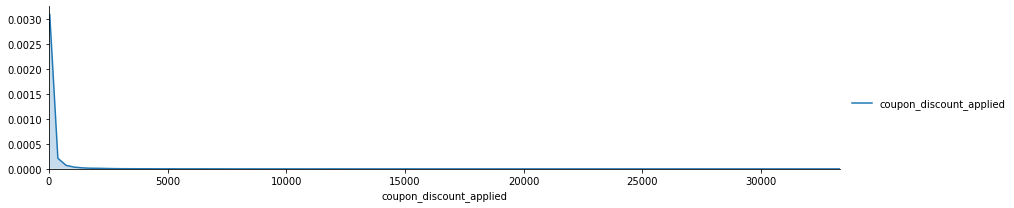

In [30]:
# Kernel Density Estimation to look at the distribution of data
g = sns.FacetGrid(df, aspect=4)
g.map(sns.kdeplot,'coupon_discount_applied',shade= True)
g.set(xlim=(df['coupon_discount_applied'].min(), df['coupon_discount_applied'].max()))
g.add_legend()

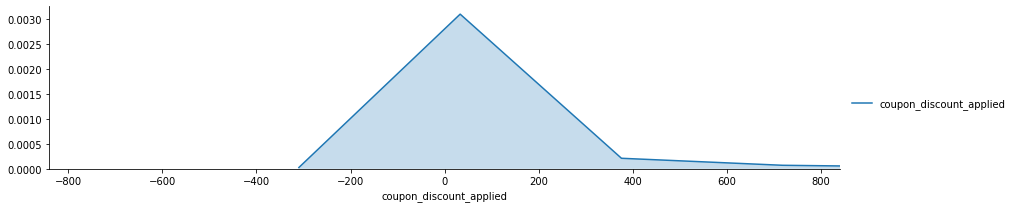

In [31]:
# A closer look at the peak of the distribution
g = sns.FacetGrid(df, aspect=4)
g.map(sns.kdeplot,'coupon_discount_applied',shade= True)
g.set(xlim=(-df['coupon_discount_applied'].std(), df['coupon_discount_applied'].std()))
g.add_legend()

In [32]:
# Looking closer at redpen_discount_used column
df.redpen_discount_used.describe()

count     46030.000000
mean        435.567699
std        1851.597072
min           0.000000
25%           0.000000
50%          54.480000
75%         253.677500
max      102653.770000
Name: redpen_discount_used, dtype: float64

In [33]:
df.redpen_discount_used.head(10)

0    4554.39
1     629.03
2    6269.71
3       0.00
4       0.00
5       0.00
6      94.59
7      85.45
8     251.58
9       0.00
Name: redpen_discount_used, dtype: float64

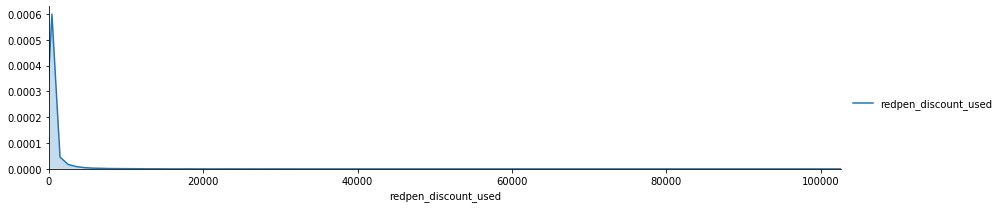

In [34]:
# Kernel Density Estimation to look at the distribution of data
g = sns.FacetGrid(df, aspect=4)
g.map(sns.kdeplot,'redpen_discount_used',shade= True)
g.set(xlim=(df['redpen_discount_used'].min(), df['redpen_discount_used'].max()))
g.add_legend()

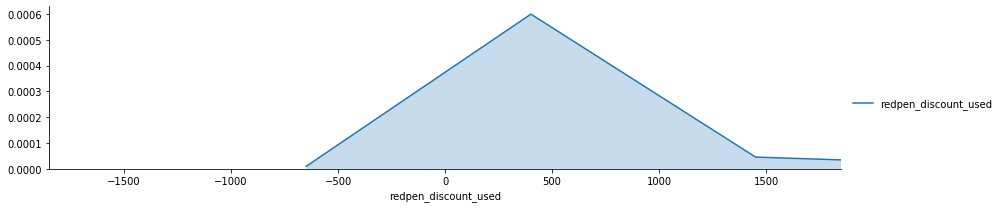

In [35]:
# A closer look at the peak of the distribution
g = sns.FacetGrid(df, aspect=4)
g.map(sns.kdeplot,'redpen_discount_used',shade= True)
g.set(xlim=(-df['redpen_discount_used'].std(), df['redpen_discount_used'].std()))
g.add_legend()

**Note:**<br>
A discrepancy discovered is that there are 43 columns in the data.<br>
However, the data definition according to the *README.md* file has 41 columns.<br>
The two new columns are *coupon_discount_applied* and *redpen_discount_used*.

**Assumptions:**<br>
Assuming "redpen/red pen discount" is the discount applied to provide the red coloured sale price of items as seen in The Iconic's online shop.

Assuming *coupon_discount_applied* should be the number of times a discount coupon was applied in the transaction.<br>
Hence the data type should be integer instead of float.

Assuming *redpen_discount_used* should be the number of times a red pen discount was used.<br>
Hence the data type should be integer instead of float.

**Questions:**<br>
Is "redpen/red pen discount" an industry or The Iconic specific terminology?

### Clean 1 - coupon_discount_applied

In [36]:
# Number of records with NaN(NULL) values
df.coupon_discount_applied.isna().sum()

10204

**Assumption:**<br>
The assumption was made that all NaN/NULL values in this column were zeroes initially but changed to NaN/Nulls throughout the data flow.<br>

**Note:**<br>
This assumption should not be made in real world scenarios, especially considering the number of records with NaN/NULL values are a significant portion (22%) of the dataset. 

In [37]:
# Convert NaN/NULL to zero and then to integer type
df['coupon_discount_applied'] = df.coupon_discount_applied.round(0).fillna(0).astype(int)
df.head(10)

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
0,0,0,0,0.3364,3584.4818,0,1,249,0,64f7d7dd7a59bba7168cc9c960a5c60e,2091,15672,17,1,0,46,1,0,N,50,1,2,2,0,0,0,17,16,0,0,0,4554.39,1,6946.34,0,4,2,3,1,35,7,0,4
1,0,0,0,0.1404,1404.0966,0,0,0,0,fa7c64efd5c037ff2abcce571f9c1712,2082,528,1,2,0,24,9,0,Y,26,4,0,0,0,12,0,13,4,0,0,1,629.03,5,5329.28,0,4,2,0,4,16,2,0,3
2,1,0,0,0.1851,1899.7270,2,1,108,0,18923c9361f27583d2320951435e4888,2072,144,61,2,1,147,11,0,Y,152,17,3,2,0,10,0,71,60,0,0,0,6269.71,2,14133.87,0,6,2,3,17,96,33,0,3
3,0,0,0,0.0000,3875.6715,0,1,91,0,aa21f31def4edbdcead818afcdfc4d32,2054,49200,2,1,0,0,0,0,Y,2,0,0,1,0,0,0,2,2,0,0,0,0.00,0,143.64,0,1,2,1,0,1,0,0,0
4,0,0,0,0.0000,0.0000,0,1,0,0,668c6aac52ff54d4828ad379cdb38e7d,2053,49272,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0.00,0,0.00,0,1,0,0,0,0,1,0,0
5,0,0,0,0.0000,0.0000,0,1,0,0,5f1e0812c41be939d971e34236d4de5b,2044,49056,1,1,0,1,0,0,N,1,1,0,0,0,0,0,1,1,0,0,0,0.00,0,63.59,0,1,0,0,1,0,0,0,0
6,0,0,0,0.6983,6983.3887,0,1,0,0,d99c815802828fff123971010c99b55b,2042,49008,1,1,0,1,0,0,N,1,0,0,0,0,0,0,1,1,0,0,0,94.59,0,40.86,0,1,0,0,0,0,1,0,0
7,0,0,0,0.2052,2488.9519,0,1,18,0,7dae973c589d913f4ca4dacbd37feedf,2041,28920,2,1,0,1,0,0,N,2,0,0,1,0,0,0,2,2,0,0,0,85.45,0,186.32,0,2,1,1,0,1,0,0,0
8,0,0,0,0.2207,2706.6216,0,1,54,0,10bc5715ecec307441b3b4f378e58592,2030,8736,4,2,0,11,3,0,N,12,3,0,0,0,4,0,8,5,0,0,0,251.58,1,774.03,0,2,1,1,3,6,3,0,0
9,0,0,0,0.0000,0.0000,1,1,0,0,111d48b932dae281aff64cae2f17c4d6,2034,48816,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0.00,0,0.00,0,1,0,0,0,0,1,0,0


### Clean 2 - redpen_discount_used

In [38]:
# Number of records with NaN values
df.redpen_discount_used.isna().sum()

0

In [39]:
# Round the float values and then convert to integer
df['redpen_discount_used'] = df.redpen_discount_used.round(0).astype(int)
df.head(10)

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
0,0,0,0,0.3364,3584.4818,0,1,249,0,64f7d7dd7a59bba7168cc9c960a5c60e,2091,15672,17,1,0,46,1,0,N,50,1,2,2,0,0,0,17,16,0,0,0,4554,1,6946.34,0,4,2,3,1,35,7,0,4
1,0,0,0,0.1404,1404.0966,0,0,0,0,fa7c64efd5c037ff2abcce571f9c1712,2082,528,1,2,0,24,9,0,Y,26,4,0,0,0,12,0,13,4,0,0,1,629,5,5329.28,0,4,2,0,4,16,2,0,3
2,1,0,0,0.1851,1899.7270,2,1,108,0,18923c9361f27583d2320951435e4888,2072,144,61,2,1,147,11,0,Y,152,17,3,2,0,10,0,71,60,0,0,0,6270,2,14133.87,0,6,2,3,17,96,33,0,3
3,0,0,0,0.0000,3875.6715,0,1,91,0,aa21f31def4edbdcead818afcdfc4d32,2054,49200,2,1,0,0,0,0,Y,2,0,0,1,0,0,0,2,2,0,0,0,0,0,143.64,0,1,2,1,0,1,0,0,0
4,0,0,0,0.0000,0.0000,0,1,0,0,668c6aac52ff54d4828ad379cdb38e7d,2053,49272,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0.00,0,1,0,0,0,0,1,0,0
5,0,0,0,0.0000,0.0000,0,1,0,0,5f1e0812c41be939d971e34236d4de5b,2044,49056,1,1,0,1,0,0,N,1,1,0,0,0,0,0,1,1,0,0,0,0,0,63.59,0,1,0,0,1,0,0,0,0
6,0,0,0,0.6983,6983.3887,0,1,0,0,d99c815802828fff123971010c99b55b,2042,49008,1,1,0,1,0,0,N,1,0,0,0,0,0,0,1,1,0,0,0,95,0,40.86,0,1,0,0,0,0,1,0,0
7,0,0,0,0.2052,2488.9519,0,1,18,0,7dae973c589d913f4ca4dacbd37feedf,2041,28920,2,1,0,1,0,0,N,2,0,0,1,0,0,0,2,2,0,0,0,85,0,186.32,0,2,1,1,0,1,0,0,0
8,0,0,0,0.2207,2706.6216,0,1,54,0,10bc5715ecec307441b3b4f378e58592,2030,8736,4,2,0,11,3,0,N,12,3,0,0,0,4,0,8,5,0,0,0,252,1,774.03,0,2,1,1,3,6,3,0,0
9,0,0,0,0.0000,0.0000,1,1,0,0,111d48b932dae281aff64cae2f17c4d6,2034,48816,1,1,0,1,0,0,Y,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0.00,0,1,0,0,0,0,1,0,0


In [40]:
df.describe(include='all')

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,curvy_items,customer_id,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,female_items,home_orders,ios_orders,is_newsletter_subscriber,items,macc_items,male_items,mapp_items,mftw_items,msite_orders,mspt_items,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,sacc_items,shipping_addresses,unisex_items,vouchers,wacc_items,wapp_items,wftw_items,work_orders,wspt_items
count,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b0f3ed00542a2304b149b0ebf9274dd0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.053595,0.043167,0.000565,0.190171,2357.118087,0.053096,0.642972,136.335086,0.041321,NaN,1371.811601,24535.400217,2.626548,1.277580,0.116402,6.472800,1.536563,0.463046,NaN,8.583750,0.573908,1.720660,0.926613,0.421290,0.978557,0.116229,4.111362,2.308386,0.000043,0.025418,0.490376,435.571844,1.626113,1305.479232,0.087899,1.501065,0.390289,0.941821,0.573908,3.800782,1.633826,0.240995,0.378753
std,0.225220,0.537200,0.023760,0.190702,2032.366465,2.175601,0.479128,745.752439,0.782744,NaN,605.777029,16934.525487,6.105990,0.533286,0.320710,17.830007,4.447233,2.484472,NaN,19.959377,2.542536,5.468827,3.689578,1.444193,2.859161,0.716745,8.122569,5.192695,0.009322,0.452441,0.499913,1851.599754,7.019715,5611.107402,0.539604,1.098996,1.230090,2.416748,2.542536,12.679782,4.088452,1.565071,1.712662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,80.974900,0.000000,0.000000,0.000000,0.000000,NaN,904.250000,6768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.360000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.150000,2122.822500,0.000000,1.000000,0.000000,0.000000,NaN,1713.000000,25416.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,54.000000,0.000000,213.015000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.314300,3829.608450,0.000000,1.000000,33.000000,0.000000,NaN,1786.000000,41640.000000,3.000000,1.000000,0.000000,5.000000,1.000000,0.000000,NaN,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,0.000000,0.000000,1.000000,254.000000,1.000000,791.

In [41]:
df.isna().sum()

afterpay_payments           0
android_orders              0
apple_payments              0
average_discount_onoffer    0
average_discount_used       0
cancels                     0
cc_payments                 0
coupon_discount_applied     0
curvy_items                 0
customer_id                 0
days_since_first_order      0
days_since_last_order       0
desktop_orders              0
devices                     0
different_addresses         0
female_items                0
home_orders                 0
ios_orders                  0
is_newsletter_subscriber    0
items                       0
macc_items                  0
male_items                  0
mapp_items                  0
mftw_items                  0
msite_orders                0
mspt_items                  0
orders                      0
other_collection_orders     0
other_device_orders         0
parcelpoint_orders          0
paypal_payments             0
redpen_discount_used        0
returns                     0
revenue   

## Stage 3: BUILD
### Labelling data for classification

In [42]:
# Consider the columns which are relevant
# Arrange the columns specific to male or female products at the end, for readability
df_X = df[['afterpay_payments',
           'android_orders',
           'apple_payments',
           'average_discount_onoffer',
           'average_discount_used',
           'cancels',
           'cc_payments',
           'coupon_discount_applied',
           'days_since_first_order',
           'days_since_last_order',
           'desktop_orders',
           'devices',
           'different_addresses',
           'home_orders',
           'ios_orders',
           'is_newsletter_subscriber',
           'items',
           'msite_orders',
           'orders',
           'other_collection_orders',
           'other_device_orders',
           'parcelpoint_orders',
           'paypal_payments',
           'redpen_discount_used',
           'returns',
           'revenue',
           'shipping_addresses',
           'vouchers',
           'work_orders',
           'male_items',
           'female_items',
           'mapp_items',
           'wapp_items',
           'mftw_items',
           'wftw_items',
           'macc_items',
           'wacc_items',
           'mspt_items',
           'wspt_items',
           'curvy_items']].copy()

# Convert the Y/N to numeric 1/0 in is_newsletter_subscriber column
df_X['is_newsletter_subscriber'] = df_X.is_newsletter_subscriber.map(dict(Y=1, N=0))

df_X.head(10)

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,home_orders,ios_orders,is_newsletter_subscriber,items,msite_orders,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,shipping_addresses,vouchers,work_orders,male_items,female_items,mapp_items,wapp_items,mftw_items,wftw_items,macc_items,wacc_items,mspt_items,wspt_items,curvy_items
0,0,0,0,0.3364,3584.4818,0,1,249,2091,15672,17,1,0,1,0,0,50,0,17,16,0,0,0,4554,1,6946.34,4,3,0,2,46,2,35,0,7,1,1,0,4,0
1,0,0,0,0.1404,1404.0966,0,0,0,2082,528,1,2,0,9,0,1,26,12,13,4,0,0,1,629,5,5329.28,4,0,0,0,24,0,16,0,2,4,4,0,3,0
2,1,0,0,0.1851,1899.7270,2,1,108,2072,144,61,2,1,11,0,1,152,10,71,60,0,0,0,6270,2,14133.87,6,3,0,3,147,2,96,0,33,17,17,0,3,0
3,0,0,0,0.0000,3875.6715,0,1,91,2054,49200,2,1,0,0,0,1,2,0,2,2,0,0,0,0,0,143.64,1,1,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0.0000,0.0000,0,1,0,2053,49272,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0,0,0,0.0000,0.0000,0,1,0,2044,49056,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,63.59,1,0,0,0,1,0,0,0,0,1,1,0,0,0
6,0,0,0,0.6983,6983.3887,0,1,0,2042,49008,1,1,0,0,0,0,1,0,1,1,0,0,0,95,0,40.86,1,0,0,0,1,0,0,0,1,0,0,0,0,0
7,0,0,0,0.2052,2488.9519,0,1,18,2041,28920,2,1,0,0,0,0,2,0,2,2,0,0,0,85,0,186.32,2,1,0,0,1,1,1,0,0,0,0,0,0,0
8,0,0,0,0.2207,2706.6216,0,1,54,2030,8736,4,2,0,3,0,0,12,4,8,5,0,0,0,252,1,774.03,2,1,0,0,11,0,6,0,3,3,3,0,0,0
9,0,0,0,0.0000,0.0000,1,1,0,2034,48816,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0


**Note:**<br>
Curvy and Plus Size in The Iconic's online shop lists exclusively women's products which is reflected in the curvy_items column.

### Assumption:
1. A customer is likely to purchase a product for themselves.<br>
That is, a male customer is likely to purchase more male products than female products and vice versa.<br>
This assumption will be used to label each record as 0 for female customers and 1 for male customers.


2. The women's fashion market is larger than men's so this will be reflected in the number of female customers versus male customers.<br>
The difference in the number of male and female customers should be considered later when evalulating the model.

In [43]:
# Add the values from female product related columns as female_sum and then the male product related columns as male_sum
df_assumption = pd.DataFrame()
df_assumption['female_sum'] = df_X['female_items'] + df_X['wapp_items'] + df_X['wftw_items'] + df_X['wacc_items'] + df_X['wspt_items'] + df_X['curvy_items']
df_assumption['male_sum'] = df_X['male_items'] + df_X['mapp_items'] + df_X['mftw_items'] + df_X['macc_items'] + df_X['mspt_items']
df_assumption.head(10)

,female_sum,male_sum
0,93,5
1,49,4
2,296,22
3,1,1
4,2,0
5,2,1
6,2,0
7,2,1
8,23,3
9,2,0


In [44]:
# Add a gender_inferred column using the columns created from above cell
df_assumption['gender_inferred'] = np.where(df_assumption.female_sum >= df_assumption.male_sum , 0, 1)
df_assumption.tail(20)

,female_sum,male_sum,gender_inferred
46259,0,2,1
46260,0,4,1
46261,2,0,0
46262,8,0,0
46263,2,0,0
46264,2,0,0
46265,0,4,1
46266,2,0,0
46267,6,1,0
46268,26,0,0


In [45]:
# Check if the ratio of Females to Males is realistic
print("Females : Males\n%d : %d" %(sum(df_assumption.gender_inferred == 0), df_assumption.gender_inferred.sum()))

Females : Males
34111 : 11919


**Note:**<br>
The ratio shows the assumption made above is likely to be a realistic.

In [46]:
# Concatenate the two dataframes into one
df_assumption = pd.concat([df_X, df_assumption], axis=1)
df_assumption.head(10)

,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,home_orders,ios_orders,is_newsletter_subscriber,items,msite_orders,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,shipping_addresses,vouchers,work_orders,male_items,female_items,mapp_items,wapp_items,mftw_items,wftw_items,macc_items,wacc_items,mspt_items,wspt_items,curvy_items,female_sum,male_sum,gender_inferred
0,0,0,0,0.3364,3584.4818,0,1,249,2091,15672,17,1,0,1,0,0,50,0,17,16,0,0,0,4554,1,6946.34,4,3,0,2,46,2,35,0,7,1,1,0,4,0,93,5,0
1,0,0,0,0.1404,1404.0966,0,0,0,2082,528,1,2,0,9,0,1,26,12,13,4,0,0,1,629,5,5329.28,4,0,0,0,24,0,16,0,2,4,4,0,3,0,49,4,0
2,1,0,0,0.1851,1899.7270,2,1,108,2072,144,61,2,1,11,0,1,152,10,71,60,0,0,0,6270,2,14133.87,6,3,0,3,147,2,96,0,33,17,17,0,3,0,296,22,0
3,0,0,0,0.0000,3875.6715,0,1,91,2054,49200,2,1,0,0,0,1,2,0,2,2,0,0,0,0,0,143.64,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0.0000,0.0000,0,1,0,2053,49272,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0
5,0,0,0,0.0000,0.0000,0,1,0,2044,49056,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,63.59,1,0,0,0,1,0,0,0,0,1,1,0,0,0,2,1,0
6,0,0,0,0.6983,6983.3887,0,1,0,2042,49008,1,1,0,0,0,0,1,0,1,1,0,0,0,95,0,40.86,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0
7,0,0,0,0.2052,2488.9519,0,1,18,2041,28920,2,1,0,0,0,0,2,0,2,2,0,0,0,85,0,186.32,2,1,0,0,1,1,1,0,0,0,0,0,0,0,2,1,0
8,0,0,0,0.2207,2706.6216,0,1,54,2030,8736,4,2,0,3,0,0,12,4,8,5,0,0,0,252,1,774.03,2,1,0,0,11,0,6,0,3,3,3,0,0,0,23,3,0
9,0,0,0,0.0000,0.0000,1,1,0,2034,48816,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0


### Feature Engineering - mean-based features

In [47]:
# Order conversion rates are meaningful for online retail businesses so derive them using existing columns

# Average cancel on orders
df_assumption.insert(loc=0, column='avg_cancels_on_orders', value=df_X.cancels/df_X.orders)

# Average return on orders
df_assumption.insert(loc=1, column='avg_returns_on_orders', value=df_X.returns/df_X.orders)

df_assumption.head(10)

,avg_cancels_on_orders,avg_returns_on_orders,afterpay_payments,android_orders,apple_payments,average_discount_onoffer,average_discount_used,cancels,cc_payments,coupon_discount_applied,days_since_first_order,days_since_last_order,desktop_orders,devices,different_addresses,home_orders,ios_orders,is_newsletter_subscriber,items,msite_orders,orders,other_collection_orders,other_device_orders,parcelpoint_orders,paypal_payments,redpen_discount_used,returns,revenue,shipping_addresses,vouchers,work_orders,male_items,female_items,mapp_items,wapp_items,mftw_items,wftw_items,macc_items,wacc_items,mspt_items,wspt_items,curvy_items,female_sum,male_sum,gender_inferred
0,0.000000,0.058824,0,0,0,0.3364,3584.4818,0,1,249,2091,15672,17,1,0,1,0,0,50,0,17,16,0,0,0,4554,1,6946.34,4,3,0,2,46,2,35,0,7,1,1,0,4,0,93,5,0
1,0.000000,0.384615,0,0,0,0.1404,1404.0966,0,0,0,2082,528,1,2,0,9,0,1,26,12,13,4,0,0,1,629,5,5329.28,4,0,0,0,24,0,16,0,2,4,4,0,3,0,49,4,0
2,0.028169,0.028169,1,0,0,0.1851,1899.7270,2,1,108,2072,144,61,2,1,11,0,1,152,10,71,60,0,0,0,6270,2,14133.87,6,3,0,3,147,2,96,0,33,17,17,0,3,0,296,22,0
3,0.000000,0.000000,0,0,0,0.0000,3875.6715,0,1,91,2054,49200,2,1,0,0,0,1,2,0,2,2,0,0,0,0,0,143.64,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0
4,0.000000,0.000000,0,0,0,0.0000,0.0000,0,1,0,2053,49272,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0
5,0.000000,0.000000,0,0,0,0.0000,0.0000,0,1,0,2044,49056,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,63.59,1,0,0,0,1,0,0,0,0,1,1,0,0,0,2,1,0
6,0.000000,0.000000,0,0,0,0.6983,6983.3887,0,1,0,2042,49008,1,1,0,0,0,0,1,0,1,1,0,0,0,95,0,40.86,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0
7,0.000000,0.000000,0,0,0,0.2052,2488.9519,0,1,18,2041,28920,2,1,0,0,0,0,2,0,2,2,0,0,0,85,0,186.32,2,1,0,0,1,1,1,0,0,0,0,0,0,0,2,1,0
8,0.000000,0.125000,0,0,0,0.2207,2706.6216,0,1,54,2030,8736,4,2,0,3,0,0,12,4,8,5,0,0,0,252,1,774.03,2,1,0,0,11,0,6,0,3,3,3,0,0,0,23,3,0
9,1.000000,0.000000,0,0,0,0.0000,0.0000,1,1,0,2034,48816,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0


In [48]:
df_assumption.avg_cancels_on_orders.describe()

count    46030.000000
mean         0.011546
std          0.089691
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: avg_cancels_on_orders, dtype: float64

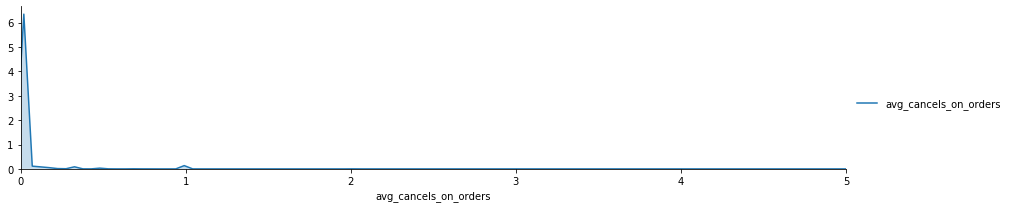

In [49]:
# Kernel Density Estimation to look at the distribution of data
g = sns.FacetGrid(df_assumption, aspect=4)
g.map(sns.kdeplot,'avg_cancels_on_orders',shade= True)
g.set(xlim=(df_assumption['avg_cancels_on_orders'].min(), df_assumption['avg_cancels_on_orders'].max()))
g.add_legend()

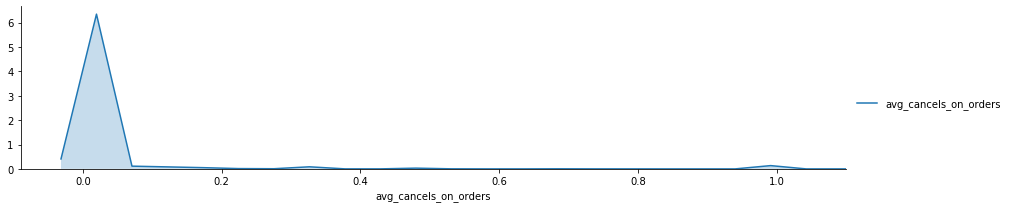

In [50]:
# Kernel Density Estimation to look at the distribution of data focusing on the peak of the data distribution
g = sns.FacetGrid(df_assumption, aspect=4)
g.map(sns.kdeplot,'avg_cancels_on_orders',shade= True)
g.set(xlim=(-df_assumption['avg_cancels_on_orders'].std(), 1.1))
g.add_legend()

**Note:**<br>
There are outliers in the data which indicated additional data cleansing may be required in the upstream systems.<br>
There is a small number of customers with avg_cancels_on_order close to 1.0 which indicate that it is highly likely that they will cancel their order.

In [51]:
df_assumption.avg_returns_on_orders.describe()

count    46030.000000
mean         0.228135
std          0.516890
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max         15.000000
Name: avg_returns_on_orders, dtype: float64

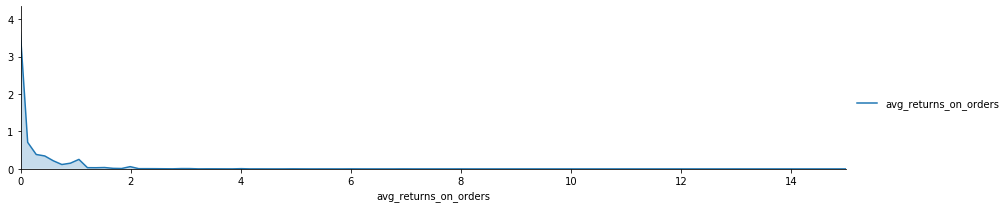

In [52]:
# Kernel Density Estimation to look at the distribution of data
g = sns.FacetGrid(df_assumption, aspect=4)
g.map(sns.kdeplot,'avg_returns_on_orders',shade= True)
g.set(xlim=(df_assumption['avg_returns_on_orders'].min(), df_assumption['avg_returns_on_orders'].max()))
g.add_legend()

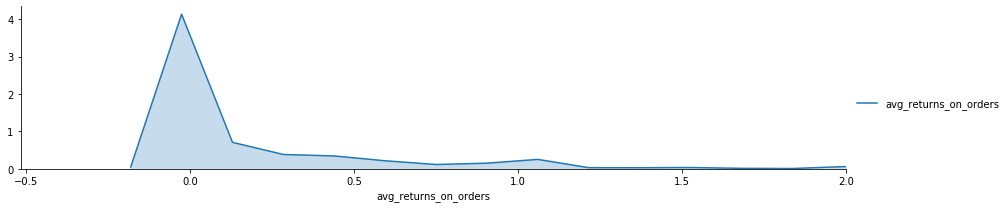

In [53]:
# Kernel Density Estimation to look at the distribution of data focusing on the peak of the data distribution
g = sns.FacetGrid(df_assumption, aspect=4)
g.map(sns.kdeplot,'avg_returns_on_orders',shade= True)
g.set(xlim=(-df_assumption['avg_returns_on_orders'].std(), 2))
g.add_legend()

**Note:**<br>
There are outliers in the data which indicated additional data cleansing may be required in the upstream systems.<br>
There is a small number of customers with avg_returns_on_order close to 1.0 which indicate that it is highly likely that they will return their order.

Text(0.5, 0.98, 'Correlation Heatmap')

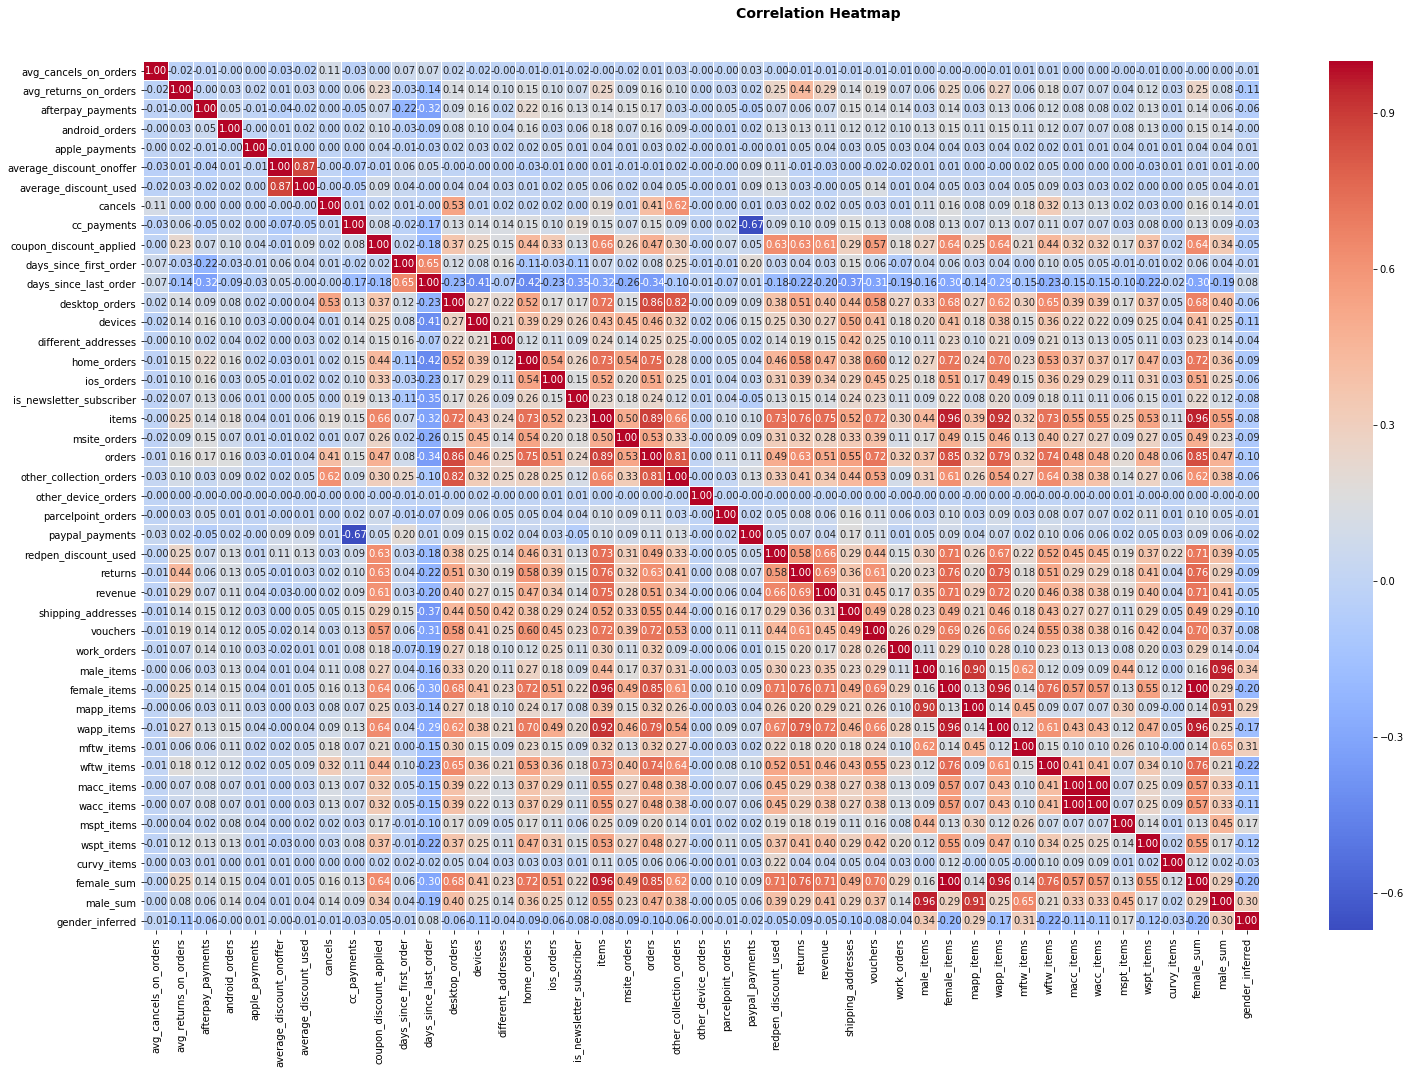

In [54]:
# Looking at a correlation matrix of the dataframe with inferred gender
corr = df_assumption.corr()

fig, (ax) = plt.subplots(1, 1, figsize=(25,15))
hm = sns.heatmap(corr, 
                 ax=ax,
                 cmap="coolwarm",
                 annot=True, 
                 fmt='.2f',
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

**Note:**<br>
The correlation matrix calculates linear correlation between features and cannot represent non-linear correlations.

Only the columns which have meaningful linear correlation to the inferred gender column were chosen for modelling.<br>
An absolute cut-off correlation value of 0.10 was chosen to define the meaningful linear correlation.

In [55]:
# Extract the target which is the gender_inferred column
corr_gender = pd.DataFrame(corr['gender_inferred'].drop('gender_inferred'))
corr_gender.abs().sort_values(by='gender_inferred',ascending=True)

,gender_inferred
android_orders,0.000232
other_device_orders,0.002755
average_discount_onoffer,0.004021
avg_cancels_on_orders,0.005747
cancels,0.006106
apple_payments,0.008908
average_discount_used,0.011375
parcelpoint_orders,0.011505
days_since_first_order,0.014517
paypal_payments,0.024285


In [56]:
# Dropping the columns below cut-off correlation value
df_assumption.drop(['android_orders',
                    'other_device_orders',
                    'average_discount_onoffer',
                    'cancels',
                    'apple_payments',
                    'average_discount_used',
                    'parcelpoint_orders',
                    'days_since_first_order',
                    'paypal_payments',
                    'cc_payments',
                    'curvy_items',
                    'work_orders',
                    'different_addresses',
                    'revenue',
                    'coupon_discount_applied',
                    'redpen_discount_used',
                    'ios_orders',
                    'afterpay_payments',
                    'desktop_orders',
                    'other_collection_orders',
                    'is_newsletter_subscriber',
                    'days_since_last_order',
                    'items',
                    'vouchers',
                    'home_orders',
                    'returns',
                    'msite_orders',
                    'shipping_addresses',
                    'orders'], axis=1, inplace=True)

Text(0.5, 0.98, 'Correlation Heatmap')

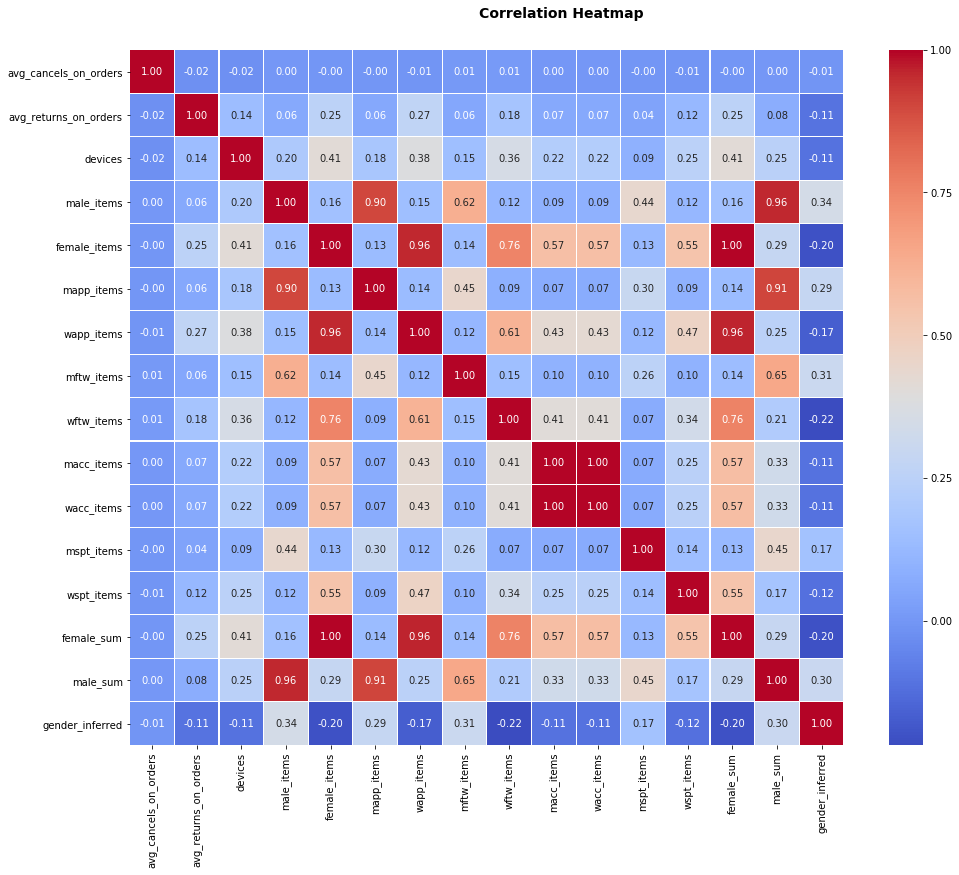

In [57]:
# Revisit and review the correlation matrix of the dataframe with inferred gender
corr = df_assumption.corr()

fig, (ax) = plt.subplots(1, 1, figsize=(16,12))
hm = sns.heatmap(corr, 
                 ax=ax,
                 cmap="coolwarm",
                 annot=True, 
                 fmt='.2f',
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

In [58]:
df_assumption.head(10)

,avg_cancels_on_orders,avg_returns_on_orders,devices,male_items,female_items,mapp_items,wapp_items,mftw_items,wftw_items,macc_items,wacc_items,mspt_items,wspt_items,female_sum,male_sum,gender_inferred
0,0.000000,0.058824,1,2,46,2,35,0,7,1,1,0,4,93,5,0
1,0.000000,0.384615,2,0,24,0,16,0,2,4,4,0,3,49,4,0
2,0.028169,0.028169,2,3,147,2,96,0,33,17,17,0,3,296,22,0
3,0.000000,0.000000,1,0,0,1,1,0,0,0,0,0,0,1,1,0
4,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,0,2,0,0
5,0.000000,0.000000,1,0,1,0,0,0,0,1,1,0,0,2,1,0
6,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,0,2,0,0
7,0.000000,0.000000,1,0,1,1,1,0,0,0,0,0,0,2,1,0
8,0.000000,0.125000,2,0,11,0,6,0,3,3,3,0,0,23,3,0
9,1.000000,0.000000,1,0,1,0,0,0,1,0,0,0,0,2,0,0


**Note:**<br>
The features used for modelling can be seen in the output of the above cell.

Inferred:
* gender_inferred - inferred gender of the customer using a logic derived from understanding the data, logic and common sense

Derived:
* female_sum - total number of women's products purchased per customer
* male_sum - total number of men's products purchased per customer
* avg_cancels_on_orders - average of cancelled orders ( a value between 0 and 1 )<br>
A customer may not be valuable for The Iconic due to a high percentage of cancellations against their orders.<br>
A potential scenario for an order cancellation could be the customer finding a cheaper price for the same product from a competitor's website shortly after placing the order with The Iconic.<br>
* avg_returns_on_orders - average of returned orders ( a value between 0 and 1 )<br>
Similar to above in regards to high percentage of returned orders.<br>
A potential scenario for a returned order could be the customer incorrectly ordering the product size/fit<br>

Used as is:
* devices
* male_items
* female_items
* mapp_items
* wapp_items
* mftw_items
* wftw_items
* macc_items
* wacc_items
* mspt_items
* wspt_items

### Splitting Data into Train and Test Sets

In [59]:
# Specify the data 
X = df_assumption.iloc[:,0:15]

# Specify the target labels and flatten the array
y = df_assumption['gender_inferred']

# Split the data into train and test sets using a 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Standardise the data

In [60]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

### Build a Keras Model

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.<br>
Tensorflow has been used with this Notebook.

* Using Sequential model type which is a linear stack of layers
* Using Rectified Linear Unit(ReLU) as the activation function
* Using two hidden layers
* Using Sigmoid function(results in 's' shaped curve) at the output layer

In [61]:
# Initialize the model constructor
model = Sequential()

# Add an input layer matching the shape of the data
model.add(Dense(15, activation='relu', input_shape=(15,)))

# Add two hidden layers
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))

# Add an output layer
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [62]:
# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                192       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Model config
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'batch_input_shape': (None, 15),
    'dtype': 'float32',
    'units': 15,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', '

### Compile and Fit

In [64]:
# Using ADAM optimiser
# Using binary_crossentropy since we have a binary classification task
# Using accuracy as a metric
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=90, batch_size=64, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/90
34522/34522 [==============================] - 2s 54us/step - loss: 0.2530 - acc: 0.8873
Epoch 2/90
34522/34522 [==============================] - 1s 30us/step - loss: 0.0480 - acc: 0.9858
Epoch 3/90
34522/34522 [==============================] - 1s 32us/step - loss: 0.0275 - acc: 0.9916
Epoch 4/90
34522/34522 [==============================] - 1s 32us/step - loss: 0.0183 - acc: 0.9939
Epoch 5/90
34522/34522 [==============================] - 1s 32us/step - loss: 0.0132 - acc: 0.9961
Epoch 6/90
34522/34522 [==============================] - 1s 35us/step - loss: 0.0102 - acc: 0.9974
Epoch 7/90
34522/34522 [==============================] - 1s 35us/step - loss: 0.0077 - acc: 0.9983
Epoch 8/90
34522/34522 [==============================] - 1s 34us/step - loss: 0.0064 - acc: 0.9985
Epoch 9/90
34522/34522 [==============================] - 1s 38us/step - loss: 0.0051 - acc: 0.9989
Epoch 10/90
34522/34522 [===========================

34522/34522 [==============================] - 1s 28us/step - loss: 3.4307e-04 - acc: 0.9999
Epoch 79/90
34522/34522 [==============================] - 1s 27us/step - loss: 4.9716e-04 - acc: 0.9999
Epoch 80/90
34522/34522 [==============================] - 1s 29us/step - loss: 2.0860e-04 - acc: 0.9999
Epoch 81/90
34522/34522 [==============================] - 1s 31us/step - loss: 3.6811e-04 - acc: 0.9999
Epoch 82/90
34522/34522 [==============================] - 1s 28us/step - loss: 1.9839e-04 - acc: 0.9999
Epoch 83/90
34522/34522 [==============================] - 1s 30us/step - loss: 5.9916e-04 - acc: 0.9999
Epoch 84/90
34522/34522 [==============================] - 1s 29us/step - loss: 0.0013 - acc: 0.9997
Epoch 85/90
34522/34522 [==============================] - 1s 30us/step - loss: 3.3317e-04 - acc: 0.9999
Epoch 86/90
34522/34522 [==============================] - 1s 30us/step - loss: 4.3561e-04 - acc: 0.9999
Epoch 87/90
34522/34522 [==============================] - 1s 28us/step

### Predict Values

In [65]:
# Apply the trained model on the test set and the resulting predicted gender is saved into y_pred variable
y_pred = model.predict(X_test, batch_size=1)
y_pred[:5]

array([[9.4053899e-31],
       [9.9999976e-01],
       [9.9999869e-01],
       [1.1676497e-19],
       [9.9999988e-01]], dtype=float32)

**Note:**
Please note the values in the above array are very close to 0, 1, 1, 0 and 1 in order.

In [66]:
# Now compare the predicted gender with the gender from the test set
y_test[:5]

32560    0
38299    1
41151    1
18314    0
15765    1
Name: gender_inferred, dtype: int64

**Note:**<br>
model predicted gender 0,1,1,0,1
test set gender 0,1,1,0,1

The above result shows the model has predicted the gender correctly for the first 5 records.

### Evaluate Model

In [67]:
# Evaluate returns loss and accuracy of the model
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

11508/11508 [==============================] - 0s 29us/step
[0.003984074409047055, 0.9993048314216197]


**Note:**
* Low loss is better
* High accuracy is better

In [68]:
# Confusion matrix
y_pred = y_pred.round().astype(int)
confusion_matrix(y_test, y_pred)

array([[8563,    6],
       [   2, 2937]])

**Note:**

Please interpret the above results as the following:

$\left[ \begin{array}{conf_matrix}
Number of correct predictions at female gender(fn), & Number of incorrect predictions at female gender(tn) \\
Number of incorrect predictions at male gender(tp), & Number of correct predictions at male gender(fp) \\ \end{array} \right]$

The resulting predictions accurately reflect the test data

In [69]:
# Precision (positive predictive value)
precision_score(y_test, y_pred)

0.9979612640163099

**Note:**<br>
0 to 1, higher is better

In [70]:
# Recall (sensitivity)
recall_score(y_test, y_pred)

0.9993194964273563

**Note:**<br>
0 to 1, higher is better

In [71]:
# F1 score (weighted average of precision and recall)
# The distribution of records with inferred gender was uneven so F1 score is important for this scenario.
f1_score(y_test,y_pred)

0.9986399183951038

**Note:**<br>
0 to 1, higher is better

In [72]:
# Cohen's kappa (interrater reliability)
# https://www.statisticshowto.datasciencecentral.com/cohens-kappa-statistic/
cohen_kappa_score(y_test, y_pred)

0.998173010782737

**Note:**<br>
0 to 1, higher is better

## End of notebook